# Mixing State Indices Demonstration

This script generates Figure 2. The concept of aerosol mixing state indices $\chi_{\rm{a}}$, $\chi_{\rm{o}}$, and $\chi_{\rm{h}}$ for a population consisting of six chemical species, where the bulk mass fractions of species are the same for all six species

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_chi(a, prt=None):
    ###reference###
    #http://lagrange.mechse.illinois.edu/pubs/RiWe2013/RiWe2013.pdf
    np_sum = np.sum(a)
    
    # pa_i is mass fraction of species a in particle i
    pa_i = a/(a.sum(axis=1)[:,None])
    # pi is mass fraction of particle i in population
    pi = a.sum(axis=1)/np_sum
    # pa is mass fraction of species a in population
    pa = a.sum(axis=0)/np_sum
    
    D_i = np.prod(np.power(pa_i,-pa_i),axis=1)
    D_alpha=np.prod(np.power(D_i,pi))
    D_gamma=np.prod(np.power(pa,-pa))
    
    if (prt!=None):
        print("D_alpha {:8.2f}".format(D_alpha))
        print("D_gamma {:8.2f}".format(D_gamma))
    
    return (D_alpha-1)/(D_gamma-1)

def gen_mat(return_mat, n, _sum): # generate a vector with a fixed sum 
    # http://sunny.today/generate-random-integers-with-fixed-sum/
    return_mat = np.random.multinomial(_sum, np.ones(n)/n, size=1)[0]
    return_mat = return_mat/_sum #(normalized to 1)
    return return_mat

def pie_plot(mat, colors=["#000000","#FF7F0E","#7efc3f","#1F77B4","#e027e6","#D62728"],labels=None):
    # The fractional area of each wedge is given by x/sum(x). 
    # If sum(x) < 1, then the values of x give the fractional area directly and the array will not be normalized. 
    # The resulting pie will have an empty wedge of size 1 - sum(x).
    fig, axes = plt.subplots(2, 3)
    axes=axes.ravel()
    mat_min = mat.sum(axis=1).min()
    # plot each pie chart in a separate subplot
    for i in range(6):
        if i==0:
            axes[i].pie((mat[i]/mat_min),radius=sum(mat[i]),colors=colors,labels=labels)
        else:
            axes[i].pie((mat[i]/mat_min),radius=sum(mat[i]),colors=colors)
    plt.show()
    
def pie_workflow(a,prt,labels): # plot chi_abd, chi_hyg, and chi_opt1
    
    mass_frac_abd=a
    print("chi_abd {:8.2f}%".format(get_chi(a, prt=prt)*100))
    #labels=["bc","dst","pom","ncl","soa","so4"]
    pie_plot(a,labels=labels)
    print("\n")
    
    mass_frac_opt = np.concatenate((a[:,:1].sum(axis=1).reshape(-1,1),
                                    a[:,1:].sum(axis=1).reshape(-1,1)),
                                    axis=1)
    print("chi_opt {:8.2f}%".format(get_chi(mass_frac_opt, prt=prt)*100))
    #labels=["bc","non-bc"]
    pie_plot(mass_frac_opt,colors=["#000000","#f2ed66"],labels=labels)   #"#b061fa"],labels=labels)
    print("\n")
    
    mass_frac_hyg = np.concatenate((a[:,:3].sum(axis=1).reshape(-1,1),
                                    a[:,3:].sum(axis=1).reshape(-1,1)),
                                    axis=1)
    print("chi_hyg {:8.2f}%".format(get_chi(mass_frac_hyg, prt=prt)*100))
    #labels=["bc+dst+pom","ncl+soa+so4"]
    pie_plot(mass_frac_hyg,colors=['#27e673',"#27b9e6"],labels=labels)

## Internally mixed

### Uneven size

randomly generate

In [3]:
another_int=np.random.multinomial(100, np.ones(6)/6, size=1)[0]/100  # create a row with
print("bulk:",another_int)
another_int=np.transpose(np.tile(another_int,(6,1))) # broadcast the row and take the transpose
print("particles:",another_int)

array([0.18, 0.17, 0.18, 0.2 , 0.16, 0.11])

load and plot

D_alpha     6.00
D_gamma     6.00
chi_abd   100.00%


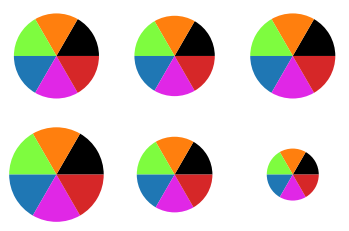



D_alpha     1.57
D_gamma     1.57
chi_opt   100.00%


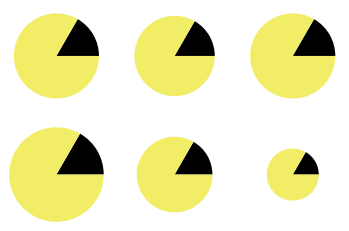



D_alpha     2.00
D_gamma     2.00
chi_hyg   100.00%


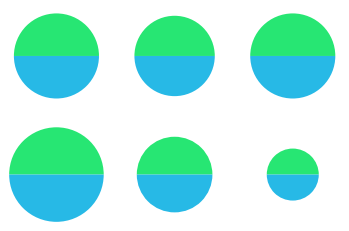

In [3]:
another_int = np.loadtxt("100_uneven.txt")
pie_workflow(another_int,True,labels=None)

### Even size

randomly generate

D_alpha     6.00
D_gamma     6.00
chi_abd   100.00%


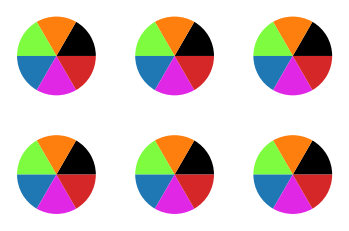



D_alpha     1.57
D_gamma     1.57
chi_opt   100.00%


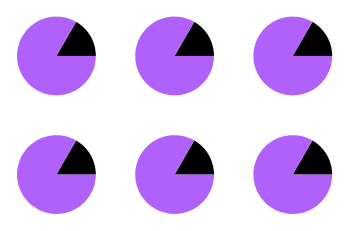



D_alpha     2.00
D_gamma     2.00
chi_hyg   100.00%


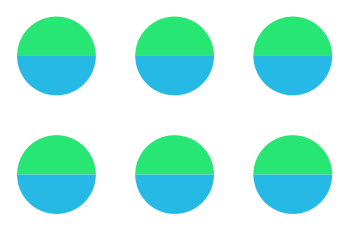

In [6]:
a = np.full((6,6),1/6)
pie_workflow(a,True,labels=None)
np.savetxt("100_even.txt",a)

load and plot

D_alpha     6.00
D_gamma     6.00
chi_abd   100.00%


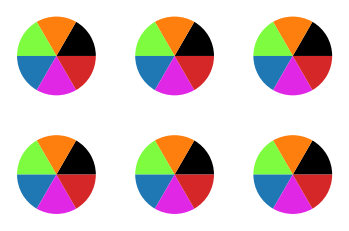



D_alpha     1.57
D_gamma     1.57
chi_opt   100.00%


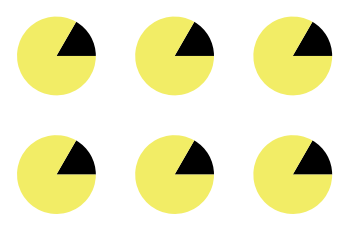



D_alpha     2.00
D_gamma     2.00
chi_hyg   100.00%


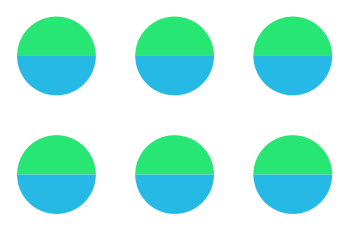

In [4]:
a = np.loadtxt("100_even.txt")
pie_workflow(a,True,labels=None)

## Externally mixed

randomly generate

D_alpha     1.00
D_gamma     6.00
chi_abd     0.00%


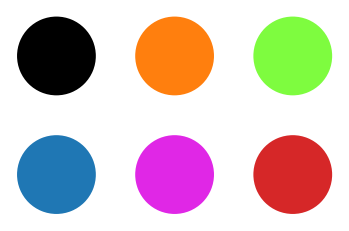



D_alpha     1.00
D_gamma     1.57
chi_opt     0.00%


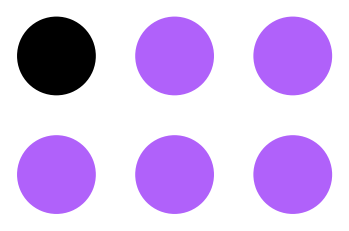



D_alpha     1.00
D_gamma     2.00
chi_hyg     0.00%


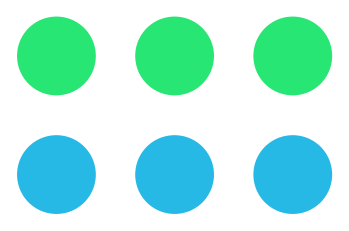

In [7]:
a = np.identity(6)
pie_workflow(a,True,labels=None)
np.savetxt("0.txt",a)

load and plot

D_alpha     1.00
D_gamma     6.00
chi_abd     0.00%


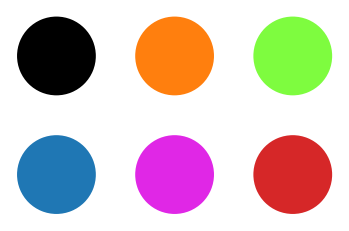



D_alpha     1.00
D_gamma     1.57
chi_opt     0.00%


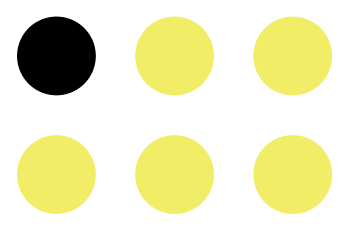



D_alpha     1.00
D_gamma     2.00
chi_hyg     0.00%


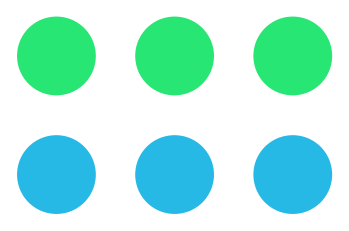

In [5]:
a = np.loadtxt("0.txt")
pie_workflow(a,True,labels=None)

## Mixing State ~20%

randomly generate

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


D_alpha     2.00
D_gamma     6.00
chi_abd    20.00%


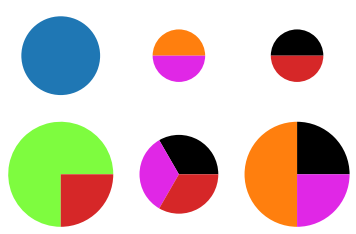



D_alpha     1.36
D_gamma     1.57
chi_opt    63.39%


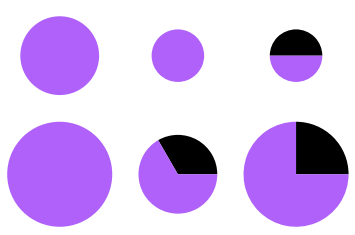



D_alpha     1.67
D_gamma     2.00
chi_hyg    66.54%


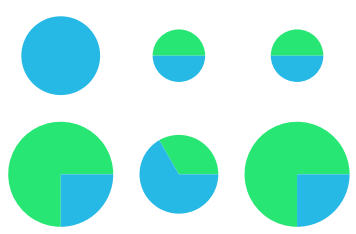

In [10]:
return_mat=np.zeros((6,6))
ms=1
while ~((ms<0.201)&(ms>0.199)):
    a = np.apply_along_axis(gen_mat,0,return_mat,6,3)
    ms = get_chi(a, prt=None)
pie_workflow(a,True,labels=None)
np.savetxt("20.txt",a)

load and plot

D_alpha     2.00
D_gamma     6.00
chi_abd    20.00%


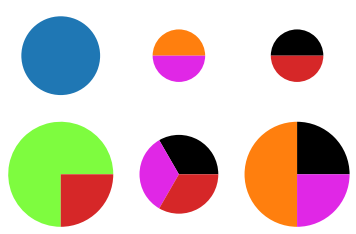



D_alpha     1.36
D_gamma     1.57
chi_opt    63.39%


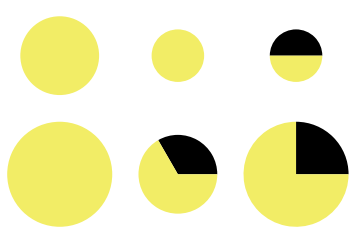



D_alpha     1.67
D_gamma     2.00
chi_hyg    66.54%


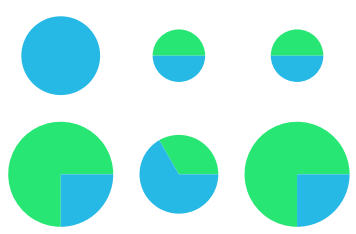

In [6]:
a=np.loadtxt("20.txt")
pie_workflow(a,True,labels=None)
#np.savetxt("20.txt",a)

## Mixing State ~50%

randomly generate

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


D_alpha     3.50
D_gamma     6.00
chi_abd    49.90%


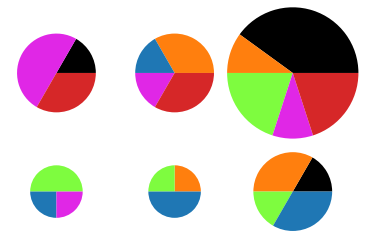



D_alpha     1.40
D_gamma     1.57
chi_opt    70.44%


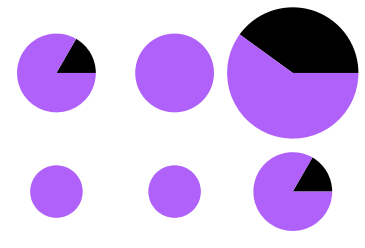



D_alpha     1.84
D_gamma     2.00
chi_hyg    84.22%


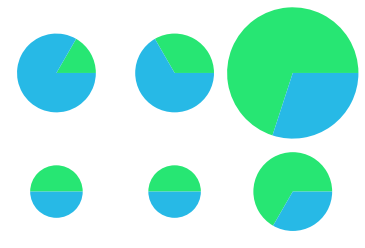

In [7]:
return_mat=np.zeros((6,6))
ms=1
while ~((ms<0.501)&(ms>0.499)):
    a = np.apply_along_axis(gen_mat,0,return_mat,6,6)
    ms = get_chi(a, prt=None)
pie_workflow(a,True,labels=None)
np.savetxt("50.txt",a)

load and plot

D_alpha     3.50
D_gamma     6.00
chi_abd    49.90%


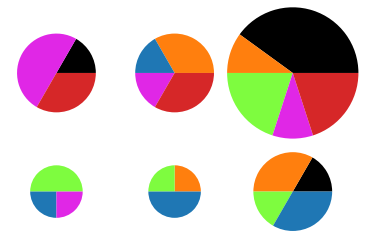



D_alpha     1.40
D_gamma     1.57
chi_opt    70.44%


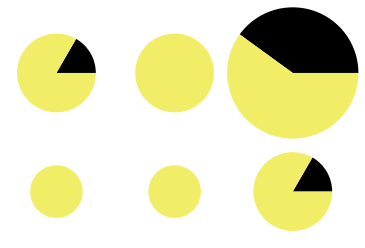



D_alpha     1.84
D_gamma     2.00
chi_hyg    84.22%


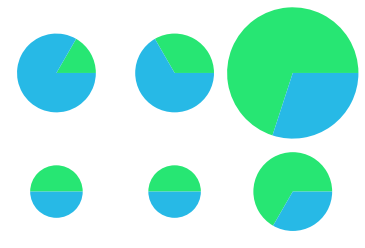

In [7]:
a=np.loadtxt("50.txt")
pie_workflow(a,True,labels=None)

## Mixing State ~80%

randomly generate

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


D_alpha     5.00
D_gamma     6.00
chi_abd    79.95%


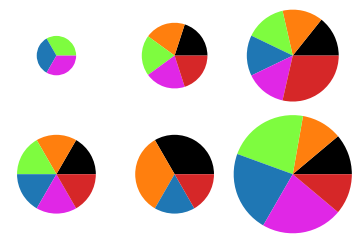



D_alpha     1.52
D_gamma     1.57
chi_opt    91.07%


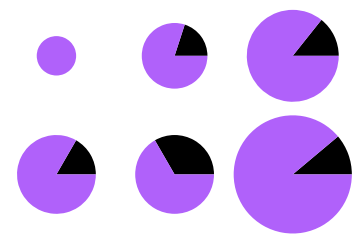



D_alpha     1.96
D_gamma     2.00
chi_hyg    95.94%


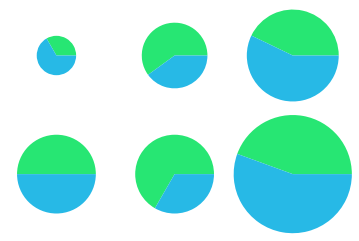

In [14]:
return_mat=np.zeros((6,6))
ms=1
while ~((ms<0.801)&(ms>0.799)):
    a = np.apply_along_axis(gen_mat,0,return_mat,6,6)
    ms = get_chi(a, prt=None)
pie_workflow(a,True,labels=None)
np.savetxt("80.txt",a)

load and plot

D_alpha     5.00
D_gamma     6.00
chi_abd    79.95%


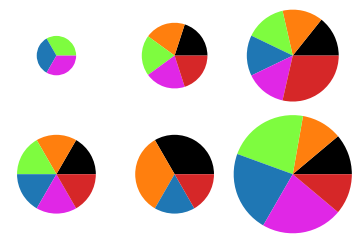



D_alpha     1.52
D_gamma     1.57
chi_opt    91.07%


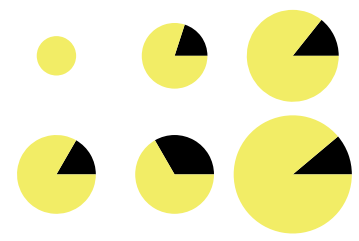



D_alpha     1.96
D_gamma     2.00
chi_hyg    95.94%


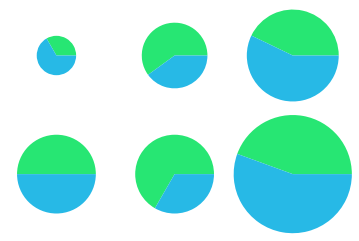

In [8]:
a=np.loadtxt("80.txt")
pie_workflow(a,True,labels=None)

## Create the donut charts

/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


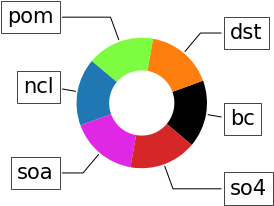

In [10]:
rc={'axes.labelsize': 21,
    'font.size': 21, 'legend.fontsize': 21, 
    'axes.titlesize': 21,
    'xtick.labelsize': 21.0,
    'ytick.labelsize': 21.0}
plt.rcParams.update(**rc)


fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["bc",
          "dst",
          "pom",
          "ncl",
          "soa",
          "so4"]

colors = ["#000000","#FF7F0E","#7efc3f","#1F77B4","#e027e6","#D62728"]

data = np.full((1,6),1./6)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Matplotlib bakery: A donut")
plt.savefig("../figures/2/abd.pdf")

plt.show()

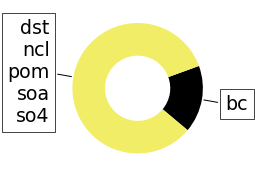

In [11]:
rc={'axes.labelsize': 19,
    'font.size': 19, 'legend.fontsize': 19, 
    'axes.titlesize': 19,
    'xtick.labelsize': 19.0,
    'ytick.labelsize': 19.0}
plt.rcParams.update(**rc)

colors=["#000000","#f2ed66"]#"#b061fa"]


fig, ax = plt.subplots(figsize=(10, 3), subplot_kw=dict(aspect="equal"))

recipe = ["bc","dst\nncl\npom\nsoa\nso4"]

data = np.array([1./6,5./6])

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Matplotlib bakery: A donut")
plt.savefig("../figures/2/opt.pdf")

plt.show()

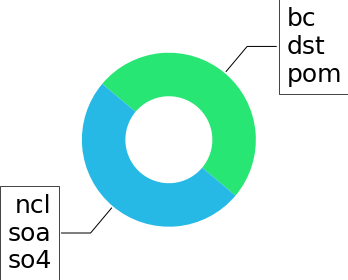

In [30]:
rc={'axes.labelsize': 25,
    'font.size': 25, 'legend.fontsize': 25, 
    'axes.titlesize': 25,
    'xtick.labelsize': 25.0,
    'ytick.labelsize': 25.0}
plt.rcParams.update(**rc)

colors=['#27e673',"#27b9e6"]


fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

recipe = ["bc\ndst\npom","ncl\nsoa\nso4"]

data = np.array([1./2,1./2])

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Matplotlib bakery: A donut")
plt.savefig("../figures/2/hyg.pdf")

plt.show()